Test your network with different numbers of layers and neurons and present the best result found.

Describe the problem that you have chosen.

1. If possible, provide a link (kaggle?) with details on the problem/dataset.
2. What is the input? What is the output?
3. What type of problem is this?
4. What are the features or attributes that you will use from the dataset.
5. What is your evaluation metric? Accuracy? RMSE? MAE? Recall/Precision?

We created a dataset based on online information from yahoo finance using an API called yfinance. The stock information used was for Amazon from 01/01/2019 - 01/01/2020 The dataset contains 7 features: Date, Open, High, Low, Close, Adj Close, and Volume. The inputs used were Open, High, and Low. The output is the Close price of the stock. The problem is to predict the Close price of the stock based on the input features. This is a regression problem. The evaluation metric is RMSE.

# Creating the dataset


In [164]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import pandas_datareader as data_reader
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

yf.pdr_override()

In [165]:
df = pdr.get_data_yahoo("AMZN", start="2019-01-01", end="2020-01-01")

[*********************100%%**********************]  1 of 1 completed


In [171]:
df
date = df.index

Text(0.5, 1.0, 'Amazon Stock Closing Price')

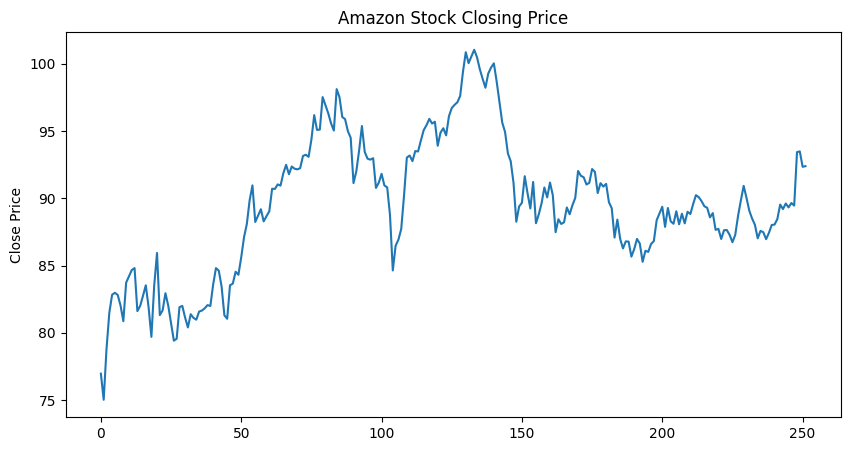

In [167]:
plt.figure(figsize=(10, 5))
df['Close'].plot()
plt.ylabel('Close Price')
plt.title('Amazon Stock Closing Price')


# Splitting the dataset

In [168]:
y = df[['Close']]
X = df[['Open', 'High', 'Low']]

print(y[:5])
print(X[:5])

       Close
0  76.956497
1  75.014000
2  78.769501
3  81.475502
4  82.829002
        Open       High        Low
0  73.260002  77.667999  73.046501
1  76.000504  76.900002  74.855499
2  76.500000  79.699997  75.915497
3  80.115501  81.727997  79.459503
4  83.234497  83.830498  80.830498


In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.43


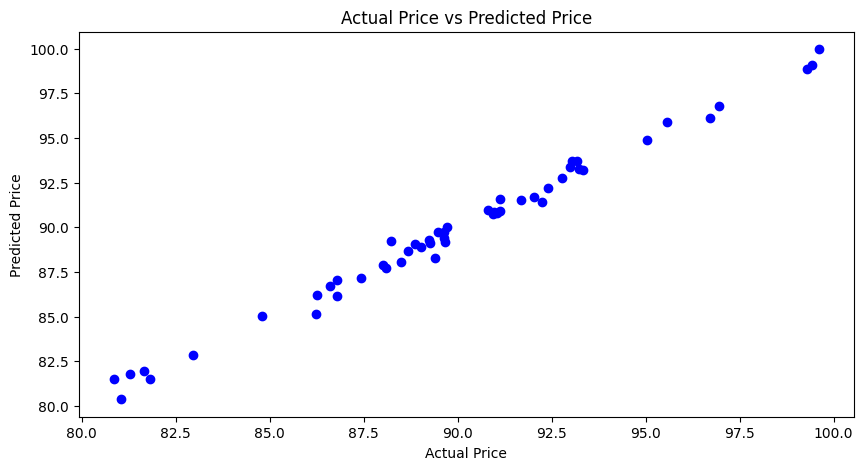

In [174]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()
